<a href="https://colab.research.google.com/github/yleessam/dl/blob/main/4_2_regressor_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2.1 회귀 알고리즘 학습을 위한 기초 지식

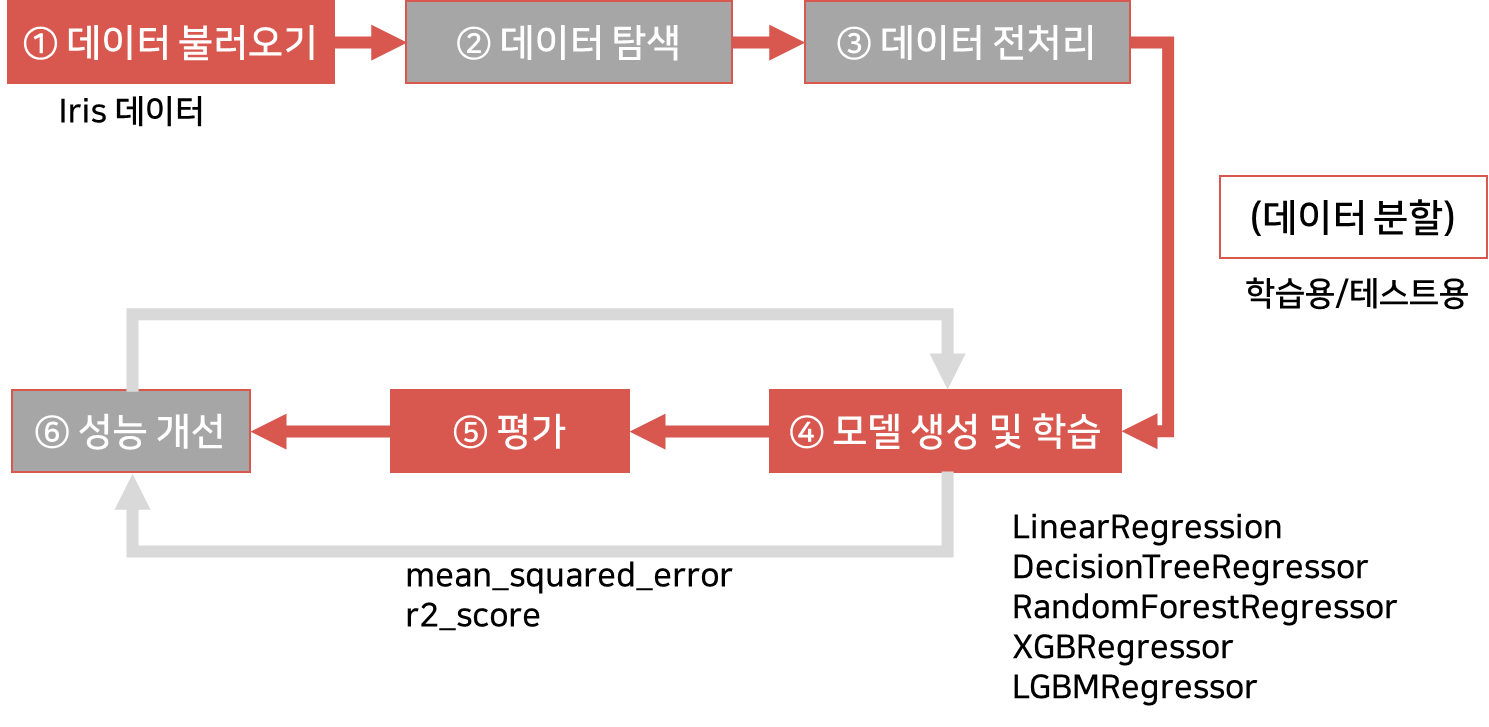

## 데이터 불러오기

In [2]:
# 라이브러리 로딩
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터 불러오기
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

## 데이터 분할

In [3]:
# 데이터분할
y = df['petal width (cm)']
X = df.drop(['petal width (cm)'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 선형 회귀 모델로 학습하기

In [4]:
# 학습 모델1 - 선형 회귀 모델
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

# 학습
lr_model.fit(X_train, y_train)
print('weight:', lr_model.coef_)
print('bias:',lr_model.intercept_)

weight: [-0.24488106  0.24482729  0.53764071]
bias: -0.1491639103657183


In [5]:
# 평가
score = lr_model.score(X_test, y_test)
print('선형회귀 모델 R2: {0:.2f}'.format(score))

선형회귀 모델 R2: 0.94


In [39]:
# 예측
y_pred_lr = lr_model.predict(X_test)

import pandas as pd

# 실제값과 예측값을 DataFrame으로 변환
df_result = pd.DataFrame({
    '실제값': y_test,
    '예측값': y_pred_lr
})

# 결과 출력
df_result.head()

,실제값,예측값
73,1.2,1.569489
18,0.3,0.299347
118,2.3,2.311524
78,1.5,1.510932
76,1.4,1.451837


## 의사결정나무 기반의 회귀 알고리즘

In [17]:
from sklearn.tree import DecisionTreeRegressor

# 학습 - DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# 평가
score = tree_model.score(X_test, y_test)
print('의사결정나무 R2: {0:.2f}'.format(score))

의사결정나무 R2: 0.87


In [30]:
# 예측
y_pred = tree_model.predict(X_test)

for i in range(len(y_test)):
    print('실제값 : ', y_test.iloc[i], ' 예측값 : ', y_pred[i])

실제값 :  1.2  예측값 :  1.5
실제값 :  0.3  예측값 :  0.4
실제값 :  2.3  예측값 :  1.4
실제값 :  1.5  예측값 :  1.5
실제값 :  1.4  예측값 :  1.5
실제값 :  0.4  예측값 :  0.20000000000000004
실제값 :  1.3  예측값 :  1.0
실제값 :  2.3  예측값 :  1.5
실제값 :  1.5  예측값 :  1.5
실제값 :  1.2  예측값 :  1.2
실제값 :  2.0  예측값 :  1.7
실제값 :  0.1  예측값 :  0.19999999999999998
실제값 :  0.2  예측값 :  0.3
실제값 :  0.1  예측값 :  0.19999999999999998
실제값 :  0.3  예측값 :  0.4
실제값 :  1.6  예측값 :  1.4
실제값 :  2.2  예측값 :  1.8
실제값 :  1.1  예측값 :  1.3
실제값 :  1.3  예측값 :  1.5
실제값 :  2.2  예측값 :  1.8
실제값 :  0.2  예측값 :  0.2
실제값 :  1.8  예측값 :  1.8
실제값 :  0.4  예측값 :  0.2
실제값 :  2.1  예측값 :  1.8
실제값 :  2.0  예측값 :  2.2
실제값 :  2.3  예측값 :  2.1
실제값 :  1.8  예측값 :  1.5
실제값 :  2.3  예측값 :  1.8
실제값 :  0.3  예측값 :  0.19999999999999998
실제값 :  0.2  예측값 :  0.2
실제값 :  0.2  예측값 :  0.1
실제값 :  0.4  예측값 :  0.2
실제값 :  1.4  예측값 :  1.4
실제값 :  0.2  예측값 :  0.2
실제값 :  0.2  예측값 :  0.19999999999999998
실제값 :  1.9  예측값 :  1.5
실제값 :  1.5  예측값 :  1.3
실제값 :  0.2  예측값 :  0.25


In [31]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

model_list = [forest_model, lgb_model, xgb_model]

for model in model_list:
    model.fit(X_train , y_train)
    score = model.score(X_test, y_test)
    model_name = model.__class__.__name__
    print('{0} 모델 R2: {1:.2f}'.format(model_name, score))

RandomForestRegressor 모델 R2: 0.94
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 112, number of used features: 3
[LightGBM] [Info] Start training from score 1.214286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

def printRegressorResult(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print('MSE : {0:.3f} , RMSE : {1:.3f}, r2 : {2:.3f}'.format(mse , rmse, r2))

In [33]:
model_list = [lr_model, tree_model, forest_model, lgb_model, xgb_model]

for model in model_list:
    y_preds = model.predict(X_test)
    print('{0} 모델'.format(model.__class__.__name__))
    printRegressorResult(y_test, y_preds)

LinearRegression 모델
MSE : 0.040 , RMSE : 0.201, r2 : 0.937
DecisionTreeRegressor 모델
MSE : 0.081 , RMSE : 0.284, r2 : 0.874
RandomForestRegressor 모델
MSE : 0.041 , RMSE : 0.204, r2 : 0.935
LGBMRegressor 모델
MSE : 0.031 , RMSE : 0.176, r2 : 0.952
XGBRegressor 모델
MSE : 0.052 , RMSE : 0.228, r2 : 0.919


# 예측결과 시각화

<Axes: >

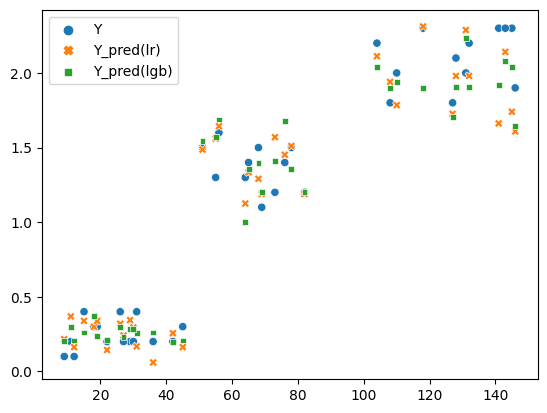

In [34]:
# 예측결과 시각화
y_pred_lr = lr_model.predict(X_test)
y_pred_lgb = lgb_model.predict(X_test)

lr_df = pd.DataFrame(data = {'Y': y_test,
                             'Y_pred(lr)': y_pred_lr,
                             'Y_pred(lgb)': y_pred_lgb})
sns.scatterplot(data=lr_df)